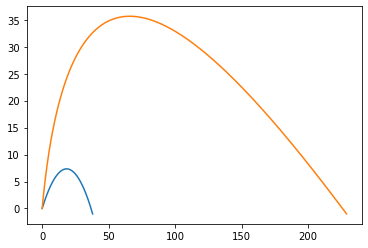

In [4]:
import math

MODEL_G = 9.81
MODEL_DT = 0.001

class Body:
    def __init__(self, x, y, vx, vy):
        """
        Создать тело.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        vx: float
            горизонтальная скорость
        vy: float
            вертикальная скорость
        """

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        

    def advance(self):
        """
        Выполнить шаг мат. модели применительно к телу, предварительно записав его координаты
        """
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        if self.y > -1:
            self.x += self.vx * MODEL_DT
            self.y += self.vy * MODEL_DT
            self.vy -= MODEL_G * MODEL_DT

class Rocket(Body):
    def __init__(self, x, y, m_0, m, ux, uy, dm):
        """
        Создать ракету.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        m_0: float
            масса ракеты без топлива
        m: float
            масса ракеты с топливом
        ux: float
            горизонтальная скорость толива
        uy: float
            вертикальная скорость топлива
        dm: float
            изменение массы ракеты
        
        """
        super().__init__(x, y, 7, 19) 
        
        self.m = m
        self.m_0 = m_0
        self.dm = dm
        self.ux = ux
        self.uy = uy

    def advance(self):
        super().advance()

        if self.m > self.m_0: 
            self.vx += self.dm/self.m*self.ux*MODEL_DT
            self.vy += self.dm/self.m*self.uy*MODEL_DT
            self.m -= self.dm*MODEL_DT

import numpy as np

b = Body(0, 0, 15, 12)
r = Rocket(0, 0, 100, 140, 180, 160, 4)

bodies = [b, r]

for t in np.arange(0, 150, MODEL_DT):
    for b in bodies:
        b.advance() 

%matplotlib inline
from matplotlib import pyplot as pp

for b in bodies:
    pp.plot(b.trajectory_x, b.trajectory_y)
